In [2]:
import logging
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os 
import shutil
import pandas as pd
import sklearn as skl
import always_function_need as afn
import random
from tqdm.notebook import tqdm
import tensorboard
from  sklearn.metrics import confusion_matrix
from sklearn.metrics  import recall_score
from sklearn.metrics  import precision_score
import itertools
import json
from sklearn.metrics  import f1_score
from sklearn.metrics  import classification_report

In [4]:
tf.debugging.set_log_device_placement(False)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.get_logger().setLevel('ERROR')

In [3]:
parent_data_file="D:\\New folder\\food10\\food-101"
json_meta_data=r"D:\\New folder\\food10\\food-101\\food-101\\meta"
new_dir="D:\\food Vision 101\\data\\10 percent of data"
image_place="D:\\New folder\\food10\\food-101\\food-101\\images"

In [4]:
dirPath=os.listdir('D:\\New folder\\food10\\food-101\\food-101\\images')
dirPath

['.DS_Store',
 'apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisq

In [25]:
#afn.create_target_class_folder(parent_data_file,'test subset','D:\\New folder\\food10\\food-101\\food-101\\images',data_set='test',target_varible=dirPath[1:],path=json_meta_data)

target data sets test
image moved from test of apple_pie is 250
image moved from test of baby_back_ribs is 250
image moved from test of baklava is 250
image moved from test of beef_carpaccio is 250
image moved from test of beef_tartare is 250
image moved from test of beet_salad is 250
image moved from test of beignets is 250
image moved from test of bibimbap is 250
image moved from test of bread_pudding is 250
image moved from test of breakfast_burrito is 250
image moved from test of bruschetta is 250
image moved from test of caesar_salad is 250
image moved from test of cannoli is 250
image moved from test of caprese_salad is 250
image moved from test of carrot_cake is 250
image moved from test of ceviche is 250
image moved from test of cheesecake is 250
image moved from test of cheese_plate is 250
image moved from test of chicken_curry is 250
image moved from test of chicken_quesadilla is 250
image moved from test of chicken_wings is 250
image moved from test of chocolate_cake is 250


'D:\\New folder\\food10\\food-101\\test subset\\test'

In [31]:
##afn.create_target_class_folder(parent_data_file,'test subset','D:\\New folder\\food10\\food-101\\food-101\\images',data_set='train',target_varible=dirPath[1:],path=json_meta_data);

target data sets train
image moved from train of apple_pie is 750
image moved from train of baby_back_ribs is 750
image moved from train of baklava is 750
image moved from train of beef_carpaccio is 750
image moved from train of beef_tartare is 750
image moved from train of beet_salad is 750
image moved from train of beignets is 750
image moved from train of bibimbap is 750
image moved from train of bread_pudding is 750
image moved from train of breakfast_burrito is 750
image moved from train of bruschetta is 750
image moved from train of caesar_salad is 750
image moved from train of cannoli is 750
image moved from train of caprese_salad is 750
image moved from train of carrot_cake is 750
image moved from train of ceviche is 750
image moved from train of cheesecake is 750
image moved from train of cheese_plate is 750
image moved from train of chicken_curry is 750
image moved from train of chicken_quesadilla is 750
image moved from train of chicken_wings is 750
image moved from train of

In [32]:
##afn.get_percent_images('D:\\New folder\\food10\\food-101\\test subset\\train',new_dir,sample_amount=0.10,random_state=47);

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainapple_pie' so we're going to copy 75 to the new directory.
Getting 75 random images for apple_pie...
Making dir: D:\foodVision101\data\10 percent of dataapple_pie
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataapple_pie/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbaby_back_ribs' so we're going to copy 75 to the new directory.
Getting 75 random images for baby_back_ribs...
Making dir: D:\foodVision101\data\10 percent of datababy_back_ribs
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datababy_back_ribs/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbaklava' so we're going to copy 75 to the new directory.
Getting 75 random images for baklava...
Making dir: D:\foodVision101\data\10 percent of databaklava
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databaklava/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbeef_carpaccio' so we're going to copy 75 to the new directory.
Getting 75 random images for beef_carpaccio...
Making dir: D:\foodVision101\data\10 percent of databeef_carpaccio
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databeef_carpaccio/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbeef_tartare' so we're going to copy 75 to the new directory.
Getting 75 random images for beef_tartare...
Making dir: D:\foodVision101\data\10 percent of databeef_tartare
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databeef_tartare/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbeet_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for beet_salad...
Making dir: D:\foodVision101\data\10 percent of databeet_salad
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databeet_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbeignets' so we're going to copy 75 to the new directory.
Getting 75 random images for beignets...
Making dir: D:\foodVision101\data\10 percent of databeignets
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databeignets/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbibimbap' so we're going to copy 75 to the new directory.
Getting 75 random images for bibimbap...
Making dir: D:\foodVision101\data\10 percent of databibimbap
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databibimbap/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbread_pudding' so we're going to copy 75 to the new directory.
Getting 75 random images for bread_pudding...
Making dir: D:\foodVision101\data\10 percent of databread_pudding
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databread_pudding/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbreakfast_burrito' so we're going to copy 75 to the new directory.
Getting 75 random images for breakfast_burrito...
Making dir: D:\foodVision101\data\10 percent of databreakfast_burrito
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databreakfast_burrito/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainbruschetta' so we're going to copy 75 to the new directory.
Getting 75 random images for bruschetta...
Making dir: D:\foodVision101\data\10 percent of databruschetta
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of databruschetta/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincaesar_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for caesar_salad...
Making dir: D:\foodVision101\data\10 percent of datacaesar_salad
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacaesar_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincannoli' so we're going to copy 75 to the new directory.
Getting 75 random images for cannoli...
Making dir: D:\foodVision101\data\10 percent of datacannoli
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacannoli/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincaprese_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for caprese_salad...
Making dir: D:\foodVision101\data\10 percent of datacaprese_salad
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacaprese_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincarrot_cake' so we're going to copy 75 to the new directory.
Getting 75 random images for carrot_cake...
Making dir: D:\foodVision101\data\10 percent of datacarrot_cake
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacarrot_cake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainceviche' so we're going to copy 75 to the new directory.
Getting 75 random images for ceviche...
Making dir: D:\foodVision101\data\10 percent of dataceviche
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataceviche/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincheesecake' so we're going to copy 75 to the new directory.
Getting 75 random images for cheesecake...
Making dir: D:\foodVision101\data\10 percent of datacheesecake
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacheesecake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincheese_plate' so we're going to copy 75 to the new directory.
Getting 75 random images for cheese_plate...
Making dir: D:\foodVision101\data\10 percent of datacheese_plate
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacheese_plate/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainchicken_curry' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_curry...
Making dir: D:\foodVision101\data\10 percent of datachicken_curry
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datachicken_curry/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainchicken_quesadilla' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_quesadilla...
Making dir: D:\foodVision101\data\10 percent of datachicken_quesadilla
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datachicken_quesadilla/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainchicken_wings' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_wings...
Making dir: D:\foodVision101\data\10 percent of datachicken_wings
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datachicken_wings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainchocolate_cake' so we're going to copy 75 to the new directory.
Getting 75 random images for chocolate_cake...
Making dir: D:\foodVision101\data\10 percent of datachocolate_cake
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datachocolate_cake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainchocolate_mousse' so we're going to copy 75 to the new directory.
Getting 75 random images for chocolate_mousse...
Making dir: D:\foodVision101\data\10 percent of datachocolate_mousse
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datachocolate_mousse/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainchurros' so we're going to copy 75 to the new directory.
Getting 75 random images for churros...
Making dir: D:\foodVision101\data\10 percent of datachurros
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datachurros/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainclam_chowder' so we're going to copy 75 to the new directory.
Getting 75 random images for clam_chowder...
Making dir: D:\foodVision101\data\10 percent of dataclam_chowder
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataclam_chowder/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainclub_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for club_sandwich...
Making dir: D:\foodVision101\data\10 percent of dataclub_sandwich
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataclub_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincrab_cakes' so we're going to copy 75 to the new directory.
Getting 75 random images for crab_cakes...
Making dir: D:\foodVision101\data\10 percent of datacrab_cakes
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacrab_cakes/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincreme_brulee' so we're going to copy 75 to the new directory.
Getting 75 random images for creme_brulee...
Making dir: D:\foodVision101\data\10 percent of datacreme_brulee
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacreme_brulee/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincroque_madame' so we're going to copy 75 to the new directory.
Getting 75 random images for croque_madame...
Making dir: D:\foodVision101\data\10 percent of datacroque_madame
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacroque_madame/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traincup_cakes' so we're going to copy 75 to the new directory.
Getting 75 random images for cup_cakes...
Making dir: D:\foodVision101\data\10 percent of datacup_cakes
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datacup_cakes/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traindeviled_eggs' so we're going to copy 75 to the new directory.
Getting 75 random images for deviled_eggs...
Making dir: D:\foodVision101\data\10 percent of datadeviled_eggs
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datadeviled_eggs/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traindonuts' so we're going to copy 75 to the new directory.
Getting 75 random images for donuts...
Making dir: D:\foodVision101\data\10 percent of datadonuts
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datadonuts/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traindumplings' so we're going to copy 75 to the new directory.
Getting 75 random images for dumplings...
Making dir: D:\foodVision101\data\10 percent of datadumplings
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datadumplings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainedamame' so we're going to copy 75 to the new directory.
Getting 75 random images for edamame...
Making dir: D:\foodVision101\data\10 percent of dataedamame
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataedamame/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traineggs_benedict' so we're going to copy 75 to the new directory.
Getting 75 random images for eggs_benedict...
Making dir: D:\foodVision101\data\10 percent of dataeggs_benedict
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataeggs_benedict/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainescargots' so we're going to copy 75 to the new directory.
Getting 75 random images for escargots...
Making dir: D:\foodVision101\data\10 percent of dataescargots
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataescargots/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfalafel' so we're going to copy 75 to the new directory.
Getting 75 random images for falafel...
Making dir: D:\foodVision101\data\10 percent of datafalafel
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafalafel/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfilet_mignon' so we're going to copy 75 to the new directory.
Getting 75 random images for filet_mignon...
Making dir: D:\foodVision101\data\10 percent of datafilet_mignon
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafilet_mignon/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfish_and_chips' so we're going to copy 75 to the new directory.
Getting 75 random images for fish_and_chips...
Making dir: D:\foodVision101\data\10 percent of datafish_and_chips
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafish_and_chips/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfoie_gras' so we're going to copy 75 to the new directory.
Getting 75 random images for foie_gras...
Making dir: D:\foodVision101\data\10 percent of datafoie_gras
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafoie_gras/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfrench_fries' so we're going to copy 75 to the new directory.
Getting 75 random images for french_fries...
Making dir: D:\foodVision101\data\10 percent of datafrench_fries
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafrench_fries/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfrench_onion_soup' so we're going to copy 75 to the new directory.
Getting 75 random images for french_onion_soup...
Making dir: D:\foodVision101\data\10 percent of datafrench_onion_soup
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafrench_onion_soup/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfrench_toast' so we're going to copy 75 to the new directory.
Getting 75 random images for french_toast...
Making dir: D:\foodVision101\data\10 percent of datafrench_toast
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafrench_toast/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfried_calamari' so we're going to copy 75 to the new directory.
Getting 75 random images for fried_calamari...
Making dir: D:\foodVision101\data\10 percent of datafried_calamari
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafried_calamari/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfried_rice' so we're going to copy 75 to the new directory.
Getting 75 random images for fried_rice...
Making dir: D:\foodVision101\data\10 percent of datafried_rice
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafried_rice/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainfrozen_yogurt' so we're going to copy 75 to the new directory.
Getting 75 random images for frozen_yogurt...
Making dir: D:\foodVision101\data\10 percent of datafrozen_yogurt
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datafrozen_yogurt/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traingarlic_bread' so we're going to copy 75 to the new directory.
Getting 75 random images for garlic_bread...
Making dir: D:\foodVision101\data\10 percent of datagarlic_bread
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datagarlic_bread/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traingnocchi' so we're going to copy 75 to the new directory.
Getting 75 random images for gnocchi...
Making dir: D:\foodVision101\data\10 percent of datagnocchi
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datagnocchi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traingreek_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for greek_salad...
Making dir: D:\foodVision101\data\10 percent of datagreek_salad
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datagreek_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traingrilled_cheese_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for grilled_cheese_sandwich...
Making dir: D:\foodVision101\data\10 percent of datagrilled_cheese_sandwich
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datagrilled_cheese_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traingrilled_salmon' so we're going to copy 75 to the new directory.
Getting 75 random images for grilled_salmon...
Making dir: D:\foodVision101\data\10 percent of datagrilled_salmon
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datagrilled_salmon/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainguacamole' so we're going to copy 75 to the new directory.
Getting 75 random images for guacamole...
Making dir: D:\foodVision101\data\10 percent of dataguacamole
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataguacamole/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traingyoza' so we're going to copy 75 to the new directory.
Getting 75 random images for gyoza...
Making dir: D:\foodVision101\data\10 percent of datagyoza
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datagyoza/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainhamburger' so we're going to copy 75 to the new directory.
Getting 75 random images for hamburger...
Making dir: D:\foodVision101\data\10 percent of datahamburger
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datahamburger/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainhot_and_sour_soup' so we're going to copy 75 to the new directory.
Getting 75 random images for hot_and_sour_soup...
Making dir: D:\foodVision101\data\10 percent of datahot_and_sour_soup
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datahot_and_sour_soup/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainhot_dog' so we're going to copy 75 to the new directory.
Getting 75 random images for hot_dog...
Making dir: D:\foodVision101\data\10 percent of datahot_dog
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datahot_dog/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainhuevos_rancheros' so we're going to copy 75 to the new directory.
Getting 75 random images for huevos_rancheros...
Making dir: D:\foodVision101\data\10 percent of datahuevos_rancheros
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datahuevos_rancheros/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainhummus' so we're going to copy 75 to the new directory.
Getting 75 random images for hummus...
Making dir: D:\foodVision101\data\10 percent of datahummus
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datahummus/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainice_cream' so we're going to copy 75 to the new directory.
Getting 75 random images for ice_cream...
Making dir: D:\foodVision101\data\10 percent of dataice_cream
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataice_cream/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainlasagna' so we're going to copy 75 to the new directory.
Getting 75 random images for lasagna...
Making dir: D:\foodVision101\data\10 percent of datalasagna
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datalasagna/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainlobster_bisque' so we're going to copy 75 to the new directory.
Getting 75 random images for lobster_bisque...
Making dir: D:\foodVision101\data\10 percent of datalobster_bisque
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datalobster_bisque/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainlobster_roll_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for lobster_roll_sandwich...
Making dir: D:\foodVision101\data\10 percent of datalobster_roll_sandwich
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datalobster_roll_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainmacaroni_and_cheese' so we're going to copy 75 to the new directory.
Getting 75 random images for macaroni_and_cheese...
Making dir: D:\foodVision101\data\10 percent of datamacaroni_and_cheese
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datamacaroni_and_cheese/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainmacarons' so we're going to copy 75 to the new directory.
Getting 75 random images for macarons...
Making dir: D:\foodVision101\data\10 percent of datamacarons
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datamacarons/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainmiso_soup' so we're going to copy 75 to the new directory.
Getting 75 random images for miso_soup...
Making dir: D:\foodVision101\data\10 percent of datamiso_soup
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datamiso_soup/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainmussels' so we're going to copy 75 to the new directory.
Getting 75 random images for mussels...
Making dir: D:\foodVision101\data\10 percent of datamussels
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datamussels/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainnachos' so we're going to copy 75 to the new directory.
Getting 75 random images for nachos...
Making dir: D:\foodVision101\data\10 percent of datanachos
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datanachos/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainomelette' so we're going to copy 75 to the new directory.
Getting 75 random images for omelette...
Making dir: D:\foodVision101\data\10 percent of dataomelette
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataomelette/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainonion_rings' so we're going to copy 75 to the new directory.
Getting 75 random images for onion_rings...
Making dir: D:\foodVision101\data\10 percent of dataonion_rings
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataonion_rings/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainoysters' so we're going to copy 75 to the new directory.
Getting 75 random images for oysters...
Making dir: D:\foodVision101\data\10 percent of dataoysters
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataoysters/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpad_thai' so we're going to copy 75 to the new directory.
Getting 75 random images for pad_thai...
Making dir: D:\foodVision101\data\10 percent of datapad_thai
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapad_thai/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpaella' so we're going to copy 75 to the new directory.
Getting 75 random images for paella...
Making dir: D:\foodVision101\data\10 percent of datapaella
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapaella/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpancakes' so we're going to copy 75 to the new directory.
Getting 75 random images for pancakes...
Making dir: D:\foodVision101\data\10 percent of datapancakes
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapancakes/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpanna_cotta' so we're going to copy 75 to the new directory.
Getting 75 random images for panna_cotta...
Making dir: D:\foodVision101\data\10 percent of datapanna_cotta
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapanna_cotta/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpeking_duck' so we're going to copy 75 to the new directory.
Getting 75 random images for peking_duck...
Making dir: D:\foodVision101\data\10 percent of datapeking_duck
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapeking_duck/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpho' so we're going to copy 75 to the new directory.
Getting 75 random images for pho...
Making dir: D:\foodVision101\data\10 percent of datapho
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapho/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: D:\foodVision101\data\10 percent of datapizza
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapizza/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpork_chop' so we're going to copy 75 to the new directory.
Getting 75 random images for pork_chop...
Making dir: D:\foodVision101\data\10 percent of datapork_chop
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapork_chop/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpoutine' so we're going to copy 75 to the new directory.
Getting 75 random images for poutine...
Making dir: D:\foodVision101\data\10 percent of datapoutine
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapoutine/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainprime_rib' so we're going to copy 75 to the new directory.
Getting 75 random images for prime_rib...
Making dir: D:\foodVision101\data\10 percent of dataprime_rib
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataprime_rib/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainpulled_pork_sandwich' so we're going to copy 75 to the new directory.
Getting 75 random images for pulled_pork_sandwich...
Making dir: D:\foodVision101\data\10 percent of datapulled_pork_sandwich
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datapulled_pork_sandwich/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainramen' so we're going to copy 75 to the new directory.
Getting 75 random images for ramen...
Making dir: D:\foodVision101\data\10 percent of dataramen
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataramen/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainravioli' so we're going to copy 75 to the new directory.
Getting 75 random images for ravioli...
Making dir: D:\foodVision101\data\10 percent of dataravioli
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataravioli/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainred_velvet_cake' so we're going to copy 75 to the new directory.
Getting 75 random images for red_velvet_cake...
Making dir: D:\foodVision101\data\10 percent of datared_velvet_cake
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datared_velvet_cake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainrisotto' so we're going to copy 75 to the new directory.
Getting 75 random images for risotto...
Making dir: D:\foodVision101\data\10 percent of datarisotto
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datarisotto/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainsamosa' so we're going to copy 75 to the new directory.
Getting 75 random images for samosa...
Making dir: D:\foodVision101\data\10 percent of datasamosa
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datasamosa/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainsashimi' so we're going to copy 75 to the new directory.
Getting 75 random images for sashimi...
Making dir: D:\foodVision101\data\10 percent of datasashimi
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datasashimi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainscallops' so we're going to copy 75 to the new directory.
Getting 75 random images for scallops...
Making dir: D:\foodVision101\data\10 percent of datascallops
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datascallops/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainseaweed_salad' so we're going to copy 75 to the new directory.
Getting 75 random images for seaweed_salad...
Making dir: D:\foodVision101\data\10 percent of dataseaweed_salad
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataseaweed_salad/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainshrimp_and_grits' so we're going to copy 75 to the new directory.
Getting 75 random images for shrimp_and_grits...
Making dir: D:\foodVision101\data\10 percent of datashrimp_and_grits
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datashrimp_and_grits/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainspaghetti_bolognese' so we're going to copy 75 to the new directory.
Getting 75 random images for spaghetti_bolognese...
Making dir: D:\foodVision101\data\10 percent of dataspaghetti_bolognese
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataspaghetti_bolognese/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainspaghetti_carbonara' so we're going to copy 75 to the new directory.
Getting 75 random images for spaghetti_carbonara...
Making dir: D:\foodVision101\data\10 percent of dataspaghetti_carbonara
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataspaghetti_carbonara/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainspring_rolls' so we're going to copy 75 to the new directory.
Getting 75 random images for spring_rolls...
Making dir: D:\foodVision101\data\10 percent of dataspring_rolls
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of dataspring_rolls/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainsteak' so we're going to copy 75 to the new directory.
Getting 75 random images for steak...
Making dir: D:\foodVision101\data\10 percent of datasteak
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datasteak/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainstrawberry_shortcake' so we're going to copy 75 to the new directory.
Getting 75 random images for strawberry_shortcake...
Making dir: D:\foodVision101\data\10 percent of datastrawberry_shortcake
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datastrawberry_shortcake/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainsushi' so we're going to copy 75 to the new directory.
Getting 75 random images for sushi...
Making dir: D:\foodVision101\data\10 percent of datasushi
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datasushi/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traintacos' so we're going to copy 75 to the new directory.
Getting 75 random images for tacos...
Making dir: D:\foodVision101\data\10 percent of datatacos
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datatacos/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traintakoyaki' so we're going to copy 75 to the new directory.
Getting 75 random images for takoyaki...
Making dir: D:\foodVision101\data\10 percent of datatakoyaki
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datatakoyaki/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traintiramisu' so we're going to copy 75 to the new directory.
Getting 75 random images for tiramisu...
Making dir: D:\foodVision101\data\10 percent of datatiramisu
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datatiramisu/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\traintuna_tartare' so we're going to copy 75 to the new directory.
Getting 75 random images for tuna_tartare...
Making dir: D:\foodVision101\data\10 percent of datatuna_tartare
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datatuna_tartare/



  0%|          | 0/75 [00:00<?, ?it/s]

There are 750 total images in 'D:\New folder\food10\food-101\test subset\trainwaffles' so we're going to copy 75 to the new directory.
Getting 75 random images for waffles...
Making dir: D:\foodVision101\data\10 percent of datawaffles
Copying images from: D:\New folder\food10\food-101\test subset\train
		 to: D:\foodVision101\data\10 percent of datawaffles/



  0%|          | 0/75 [00:00<?, ?it/s]

In [5]:
training_dir='D:\\food vision 101\\data\\'
test_dir='data 101\\test'
val_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(224,224),batch_size=32,label_mode="categorical",seed=47,shuffle=False)
train_data=tf.keras.preprocessing.image_dataset_from_directory(training_dir,image_size=(224,224),batch_size=32,label_mode="categorical")

Found 25250 files belonging to 101 classes.
Found 7575 files belonging to 101 classes.


<class 'numpy.ndarray'>
(512, 512, 3)


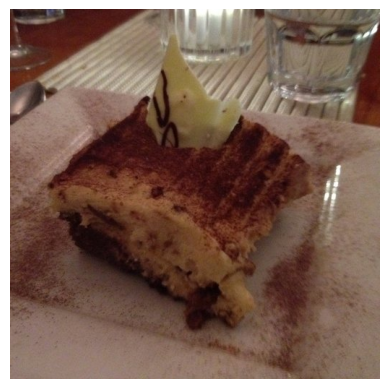

In [7]:
afn.viwe_random_image_fdir(image_place,random.choice(dirPath));

<class 'numpy.ndarray'>
(512, 512, 3)


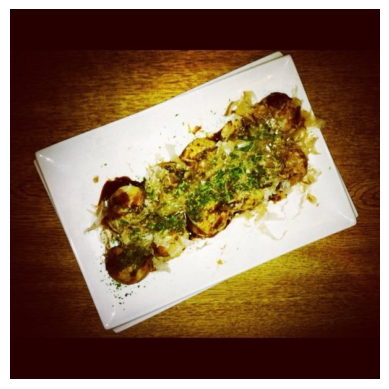

In [8]:
afn.viwe_random_image_fdir(image_place,random.choice(dirPath));

<class 'numpy.ndarray'>
(384, 512, 3)


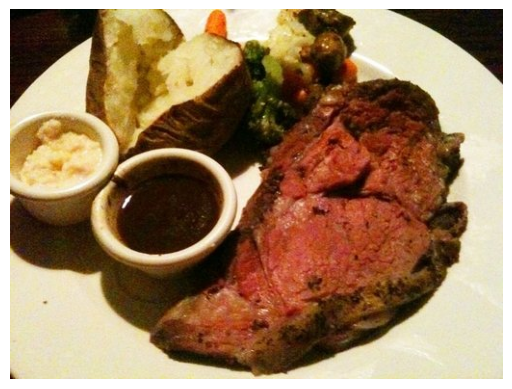

In [9]:
afn.viwe_random_image_fdir(image_place,random.choice(dirPath));

<class 'numpy.ndarray'>
(384, 512, 3)


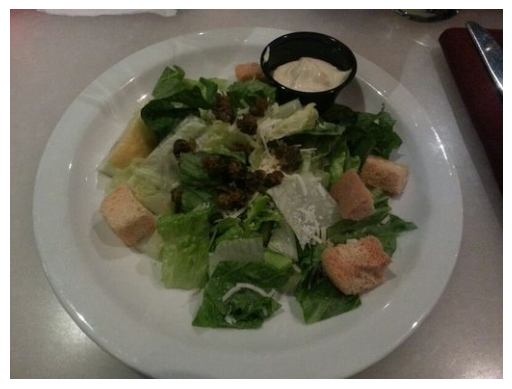

In [10]:
afn.viwe_random_image_fdir(image_place,random.choice(dirPath));

In [11]:
x=next(iter(train_data))

In [12]:
print(x[0][0].shape,"\n",x[0][0].ndim,"\n",x[0][0].dtype,"\n",tf.size(x[0]))

(224, 224, 3) 
 3 
 <dtype: 'float32'> 
 tf.Tensor(4816896, shape=(), dtype=int32)


In [13]:
def create_check_point_inst(expr:str,save_best=True):
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=r'check_point\\'+expr,
    save_best_only=save_best,
    monitor='val_loss',
    verbose=1,
    save_weights_only=True
    )
    return checkpoint_callback
feature_extraction_checkpoint=create_check_point_inst("10prefetureExt")

In [14]:
from tensorflow.keras import layers
aug_model=tf.keras.models.Sequential();
aug_model.add(layers.experimental.preprocessing.RandomFlip(mode='horizontal'));
aug_model.add(layers.RandomRotation([-0.2,0.3]));
aug_model.add(layers.RandomBrightness([-0.5,0.5]));


# build model with 10% of data

In [54]:
tf.random.set_seed(47)
eff_b0=tf.keras.applications.EfficientNetB0(include_top=False)
eff_b0.trainable=False
inputs=layers.Input((224,224,3))
x=aug_model(inputs)
x=eff_b0(x,training=False)
x=layers.GlobalAvgPool2D()(x)
output=layers.Dense(101,activation='softmax')(x)
feature_extraction_model=tf.keras.models.Model(inputs,output)
feature_extraction_model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.CategoricalAccuracy()])
history=feature_extraction_model.fit(train_data,steps_per_epoch=len(train_data),epochs=5,batch_size=32,validation_data=val_data,validation_batch_size=32,validation_steps=(0.30*len(val_data)),use_multiprocessing=True,callbacks=[feature_extraction_checkpoint,afn.create_tensorbord_callback("tensorbord","10perFeatureExtraction")])

Created log dir: tensorbord\10perFeatureExtraction\20240905-162033
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.5104 - categorical_accuracy: 0.2415
Epoch 1: val_loss improved from inf to 2.54857, saving model to check_point\10prefetureExt
237/237 [==============================] - 81s 297ms/step - loss: 3.5104 - categorical_accuracy: 0.2415 - val_loss: 2.5486 - val_categorical_accuracy: 0.4229
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.3993 - categorical_accuracy: 0.4498
Epoch 2: val_loss improved from 2.54857 to 2.05278, saving model to check_point\10prefetureExt
237/237 [==============================] - 64s 270ms/step - loss: 2.3993 - categorical_accuracy: 0.4498 - val_loss: 2.0528 - val_categorical_accuracy: 0.5041
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 2.0543 - categorical_accuracy: 0.5106
Epoch 3: val_loss improved from 2.05278 to 1.85815, saving model to check_point\10prefetureExt
237/237 [======

In [55]:
feature_extraction_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 101)               129381    
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainable params: 4,049,571
___________________________________________

In [56]:

feature_extraction_model.evaluate(val_data)

790/790 [==============================] - 50s 63ms/step - loss: 1.5768 - categorical_accuracy: 0.5876


[1.576799988746643, 0.5876039862632751]

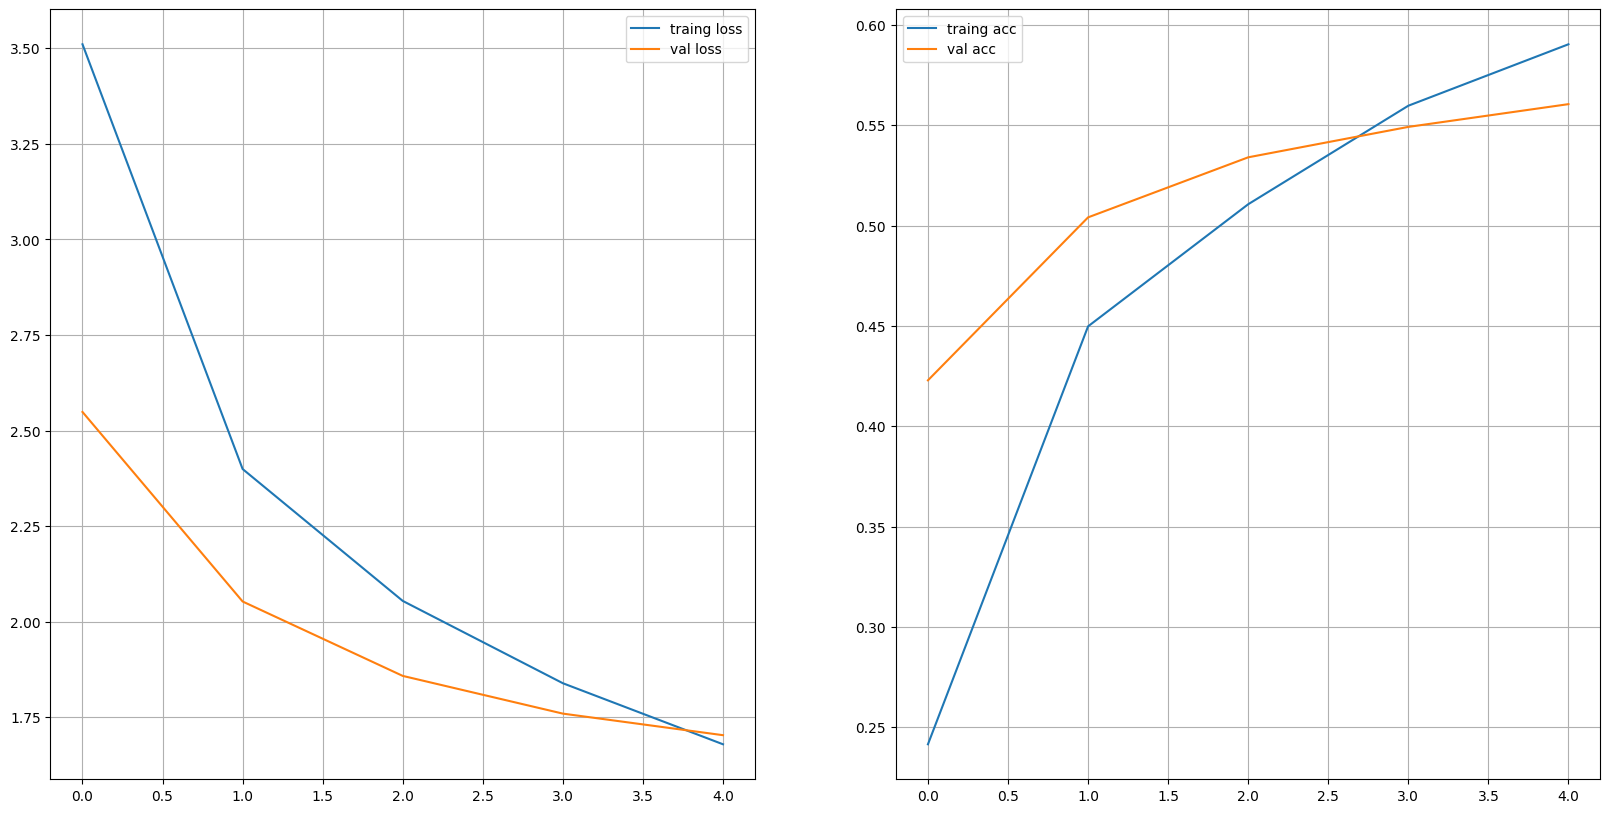

In [57]:
afn.loss_accuracy_plot(history)

In [58]:
feature_extraction_model.evaluate(val_data)

790/790 [==============================] - 43s 54ms/step - loss: 1.5768 - categorical_accuracy: 0.5876


[1.576799988746643, 0.5876039862632751]

In [14]:
feature_extraction_model.save("models creates\\feature_extraction_10per.h5")

NameError: name 'feature_extraction_model' is not defined

In [ ]:
feature_extraction_model=tf.keras.models.load_model("models creates\\feature_extraction_10per.h5")
feature_extraction_model.evaluate(val_data)

## try build model wiht same aomunt of data  but incress the number of trainable layers

In [ ]:
eff_b0=tf.keras.applications.EfficientNetB0(include_top=False)
eff_b0.trainable=True
for layer in eff_b0.layers[:-7]:
    layer.trainable=False

In [17]:
for layer in eff_b0.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001EE046C4550> False
<keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x000001F010625390> False
<keras.layers.preprocessing.normalization.Normalization object at 0x000001F01032DB70> False
<keras.layers.core.tf_op_layer.TFOpLambda object at 0x000001EE046EFCD0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x000001EE046EEB90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x000001EE44721660> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001EE478681F0> False
<keras.layers.core.activation.Activation object at 0x000001EE446DE1A0> False
<keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x000001F010627550> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001F010626DA0> False
<keras.layers.core.activation.Activation object at 0x000001F010627130> False
<keras.layers.pooling.global_average_po

In [64]:
fine_tune_checkpoint=create_check_point_inst("fine_tune_10per")
fine_tune_model=tf.keras.models.Model(inputs,output)
fine_tune_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.CategoricalAccuracy()])
fine_tune_model.load_weights('check_point\\10prefetureExt')
history_1=fine_tune_model.fit(train_data,steps_per_epoch=len(train_data),epochs=6+history.epoch[-1],batch_size=32,validation_data=val_data,validation_batch_size=32,validation_steps=(0.30*len(val_data)),use_multiprocessing=True,callbacks=[fine_tune_checkpoint,afn.create_tensorbord_callback("tensorbord","10perFineTune")],initial_epoch=history.epoch[-1])

Created log dir: tensorbord\10perFineTune\20240905-163101
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 1.5893 - categorical_accuracy: 0.6083
Epoch 5: val_loss improved from inf to 1.66517, saving model to check_point\fine_tune_10per
237/237 [==============================] - 68s 265ms/step - loss: 1.5893 - categorical_accuracy: 0.6083 - val_loss: 1.6652 - val_categorical_accuracy: 0.5632
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 1.5034 - categorical_accuracy: 0.6280
Epoch 6: val_loss improved from 1.66517 to 1.61985, saving model to check_point\fine_tune_10per
237/237 [==============================] - 61s 257ms/step - loss: 1.5034 - categorical_accuracy: 0.6280 - val_loss: 1.6199 - val_categorical_accuracy: 0.5728
Epoch 7/10
237/237 [==============================] - ETA: 0s - loss: 1.4102 - categorical_accuracy: 0.6500
Epoch 7: val_loss improved from 1.61985 to 1.60961, saving model to check_point\fine_tune_10per
237/237 [=========

In [65]:
fine_tune_model.evaluate(val_data)

790/790 [==============================] - 43s 54ms/step - loss: 1.4599 - categorical_accuracy: 0.6100


[1.459896206855774, 0.6099802255630493]

In [66]:
fine_tune_model.save("models creates\\fine_tune_10per.h5")

In [18]:
fine_tune_model=tf.keras.models.load_model("models creates\\fine_tune_10per.h5")
fine_tune_model.evaluate(val_data)

790/790 [==============================] - 47s 58ms/step - loss: 1.4599 - categorical_accuracy: 0.6100


[1.459896206855774, 0.6099802255630493]

In [20]:
afn.comper_loss_accuracy_plot(history,history_1)

KeyError: 'loss'

In [23]:
prids_pro=fine_tune_model.predict(val_data)

790/790 [==============================] - 44s 54ms/step


In [24]:
print(f"the shape of predication is {prids_pro.shape} mean it predicat the probablity of {prids_pro.shape[1]} class for {prids_pro.shape[0]} image")
print(f"the data is look like this {prids_pro[0]}\n and thies number indecate the probablity of each class and the sum of them is {sum(prids_pro[0])}")

the shape of predication is (25250, 101) mean it predicat the probablity of 101 class for 25250 image
the data is look like this [6.0107913e-02 4.3568501e-04 5.3565067e-01 2.8006390e-05 7.9667974e-05
 4.6290468e-05 3.1293128e-04 3.8541744e-05 8.7326318e-03 1.9167557e-02
 3.6056761e-05 4.3953980e-05 1.1035571e-03 3.1756242e-06 2.2109998e-02
 2.6425859e-04 4.5548168e-05 5.6676883e-03 3.2635720e-03 9.5945274e-05
 2.9307404e-03 4.5669758e-06 5.9248101e-05 1.5851729e-04 7.9501310e-04
 5.3497520e-04 3.0864496e-03 3.5930169e-04 1.1584825e-03 6.7511915e-05
 4.3156026e-05 1.1649405e-03 8.4876397e-04 7.8390141e-05 1.4581157e-02
 1.1402501e-04 9.4249292e-04 1.0251316e-03 3.9724983e-02 2.9046374e-04
 2.5294442e-03 2.2196055e-04 1.1374009e-03 5.7872861e-05 8.0042670e-04
 2.0216235e-04 9.0099676e-03 5.5285962e-04 5.9694172e-05 3.4535363e-02
 3.4239471e-03 4.8833346e-05 2.3333631e-02 3.7111431e-02 5.4645974e-05
 4.8111420e-02 7.0537408e-03 2.1767495e-03 4.4096187e-03 2.1682825e-04
 9.5594331e-04 3.45

check the trueth of first 10 preficated images

In [25]:
first_10_sample=prids_pro[:10].argmax(axis=1)
first_10_sample
true_val=[]

In [26]:
first_10_labels=[]
i=0
for image,label in val_data.unbatch():
    print(np.argmax(label)==first_10_sample[i])
    if i==9:
        break
    i+=1

False
True
False
False
False
False
False
True
False
False


In [27]:
true_val=[]
for image,label in val_data.unbatch():
    true_val.append(label)

In [28]:
len(true_val),len(prids_pro)

(25250, 25250)

In [30]:
afn.make_confusion_matrix(np.argmax(true_val,axis=1),np.argmax(prids_pro,axis=1),classes=val_data.class_names,figsize=(100,100),text_size=20)

In [40]:
def evluate_on_diff_metrix(true_labels,prdications):
    ''' 
    take true label and predication in form of probablites of each class.
    print:
    recall score
    perscion score
    F1 score
    '''
    true_labels = np.argmax(true_labels, axis=1)
    predicted_labels = np.argmax(prdications, axis=1) 
    print(f"Recall Score: {recall_score(true_labels, predicted_labels, average='macro')}")
    print(f"Perscion Score: {precision_score(true_labels,predicted_labels, average='macro')}")
    print(f"F1 Score: {f1_score(true_labels,predicted_labels, average='macro')}")
evluate_on_diff_metrix(true_val,prids_pro)

Recall Score: 0.609980198019802
Perscion Score: 0.6235911542076694
F1 Score: 0.6070595279479121


In [50]:
print(classification_report(np.argmax(true_val,axis=1),np.argmax(prids_pro,axis=1)))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       250
           1       0.68      0.60      0.64       250
           2       0.62      0.62      0.62       250
           3       0.61      0.61      0.61       250
           4       0.64      0.46      0.54       250
           5       0.54      0.44      0.48       250
           6       0.61      0.80      0.69       250
           7       0.82      0.74      0.78       250
           8       0.33      0.52      0.41       250
           9       0.52      0.56      0.54       250
          10       0.44      0.47      0.45       250
          11       0.67      0.68      0.67       250
          12       0.70      0.65      0.67       250
          13       0.65      0.60      0.62       250
          14       0.53      0.63      0.57       250
          15       0.42      0.42      0.42       250
          16       0.63      0.62      0.62       250
          17       0.40    

In [62]:
classification_repo=classification_report(np.argmax(true_val,axis=1),np.argmax(prids_pro,axis=1),output_dict=True)

In [72]:
classification_repo['100']

{'precision': 0.8187134502923976,
 'recall': 0.56,
 'f1-score': 0.665083135391924,
 'support': 250.0}

In [84]:
f1_score_c={val_data.class_names[i]:classification_repo[f'{i}']['f1-score'] for i in range(101)}
precision_score_c={val_data.class_names[i]:classification_repo[f'{i}']['precision'] for i in range(101)}
recall_score_c={val_data.class_names[i]:classification_repo[f'{i}']['recall'] for i in range(101)}

In [87]:
df_f1=pd.DataFrame({"class_name":list(f1_score_c.keys()),"f1_score":list(f1_score_c.values())}).sort_values(by="f1_score",ascending=False)
df_f1

class_name  f1_score
33    edamame  0.960938
63   macarons  0.922131
69    oysters  0.850622
51  guacamole  0.849593
65    mussels  0.833684
..        ...       ...
87   scallops  0.337165
93      steak  0.335430
39  foie_gras  0.296296
77  pork_chop  0.274286
0   apple_pie  0.264151

[101 rows x 2 columns]

In [89]:
df_recall=pd.DataFrame({"class_name":list(recall_score_c.keys()),"recall_score":list(recall_score_c.values())}).sort_values(by="recall_score",ascending=False)
df_recall

class_name  recall_score
33                  edamame         0.984
91      spaghetti_carbonara         0.936
54        hot_and_sour_soup         0.924
75                      pho         0.916
63                 macarons         0.900
..                      ...           ...
49  grilled_cheese_sandwich         0.284
99             tuna_tartare         0.248
0                 apple_pie         0.224
39                foie_gras         0.208
77                pork_chop         0.192

[101 rows x 2 columns]

In [90]:
df_precision=pd.DataFrame({"class_name":list(recall_score_c.keys()),"precision_score":list(precision_score_c.values())}).sort_values(by="precision_score",ascending=False)
df_precision

class_name  precision_score
63       macarons         0.945378
33        edamame         0.938931
69        oysters         0.883621
65        mussels         0.880000
95          sushi         0.871622
..            ...              ...
8   bread_pudding         0.332487
37   filet_mignon         0.330218
87       scallops         0.323529
0       apple_pie         0.321839
82        ravioli         0.312081

[101 rows x 2 columns]

In [137]:
def score_classes(metrix_type:str,class_name,scores):
    plt.figure(figsize=(20,20))
    plt.barh(range(len(scores)),scores*100,height=0.7)
    plt.yticks(ticks=range(len(scores)),labels=class_name);
    plt.xlabel(f"{metrix_type} score")
    plt.title(f"{metrix_type} score for diff 101 class")
    for i, score in enumerate(scores):
        plt.text(score * 100 + 0.5, i, f"{score * 100:.1f}%", va='center', fontsize=10)
    plt.show()


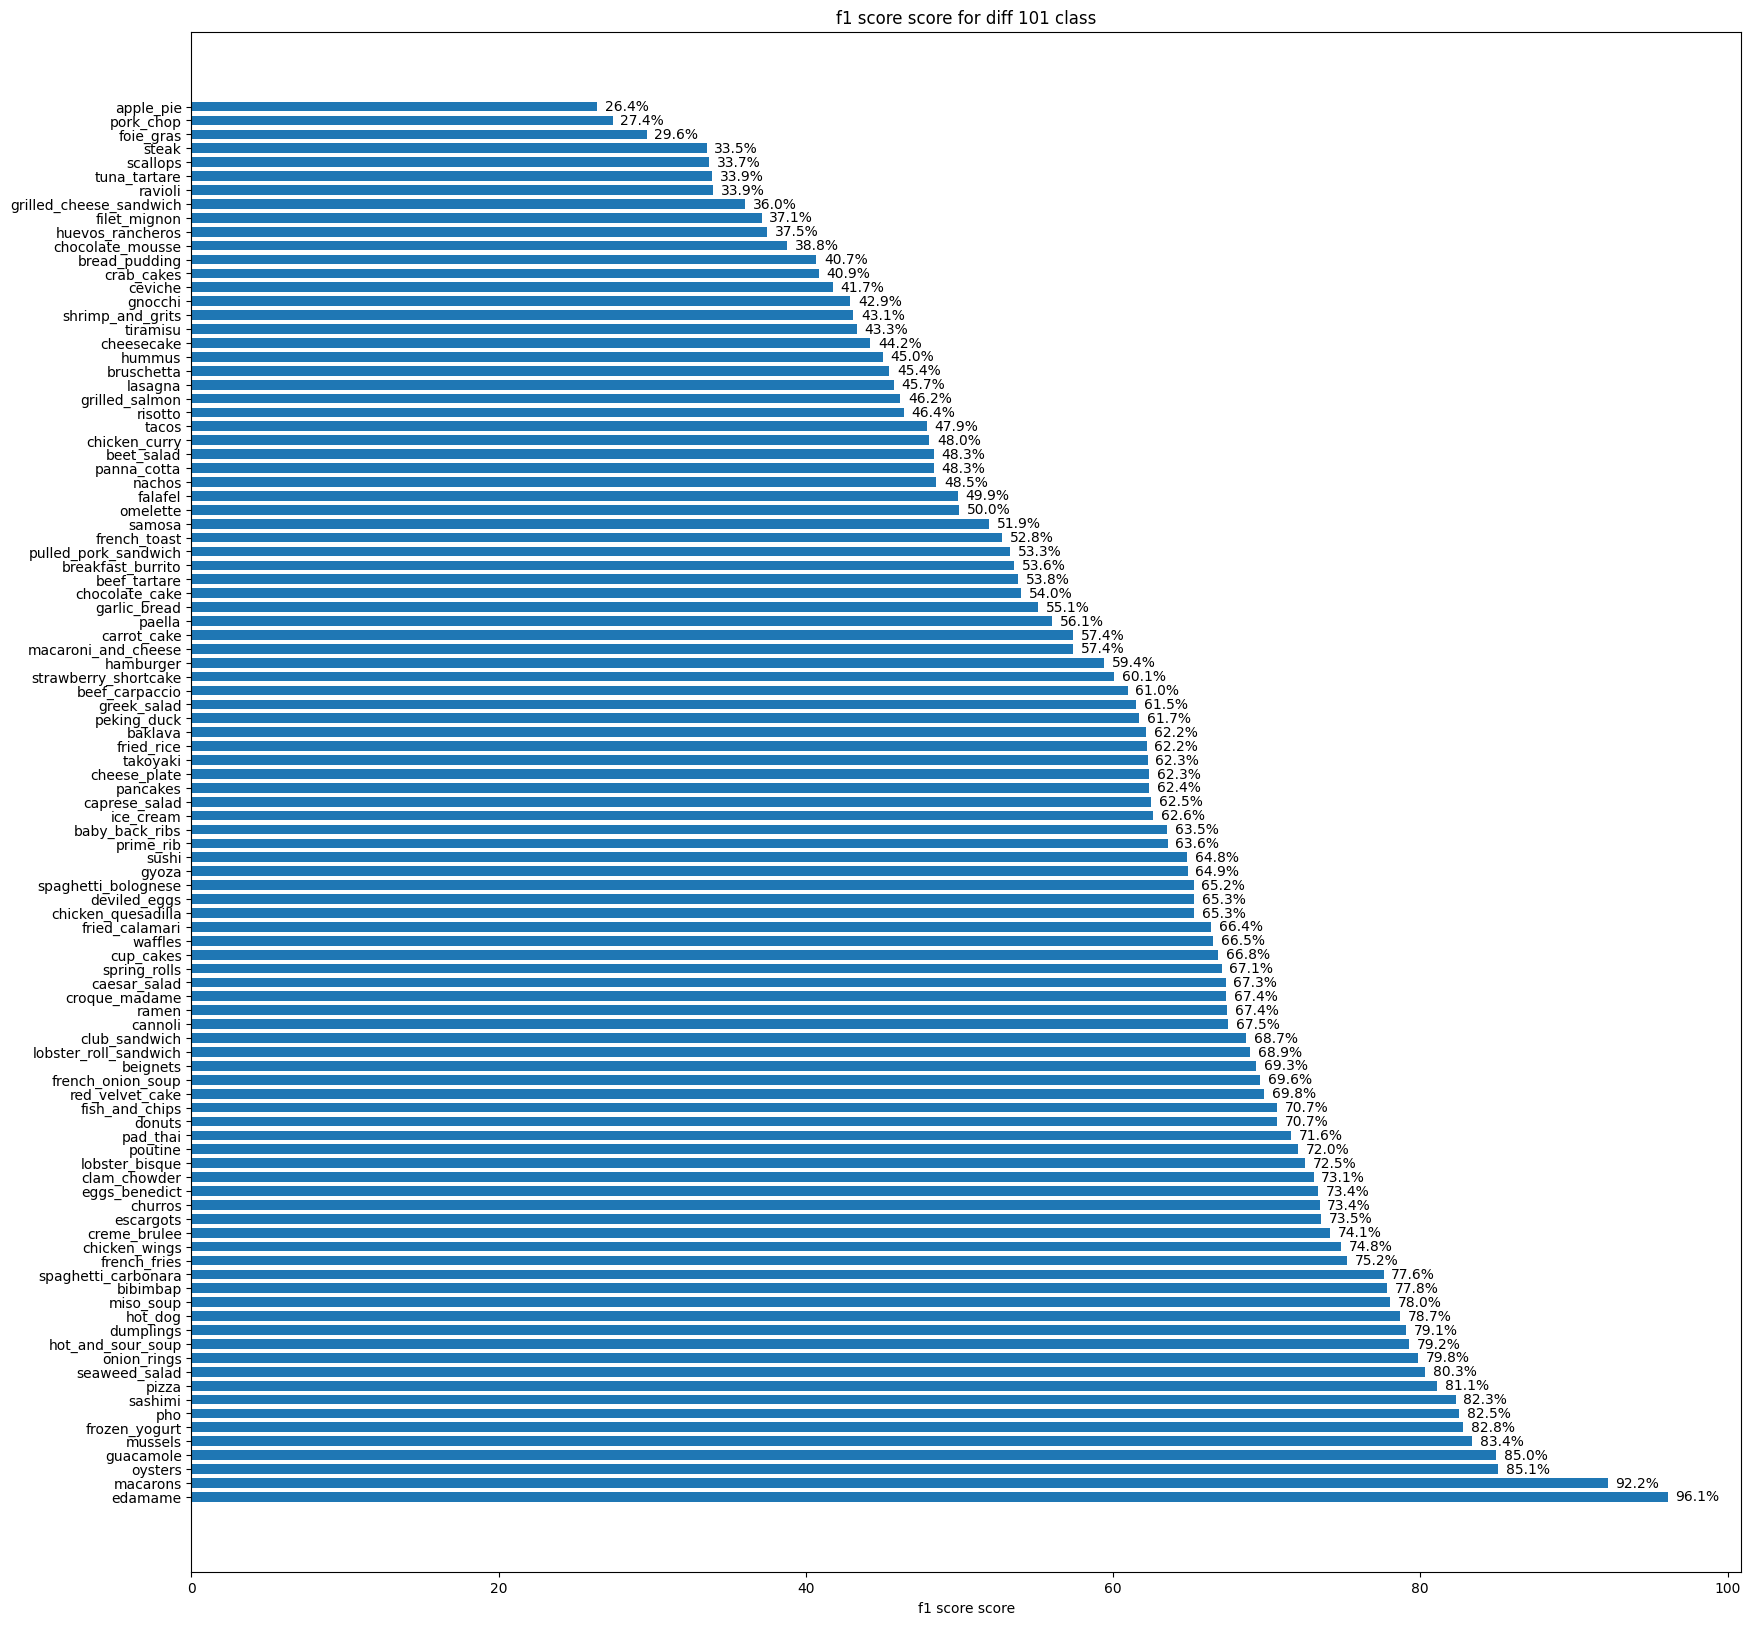

In [138]:
score_classes("f1 score",df_f1.class_name,df_f1.f1_score)

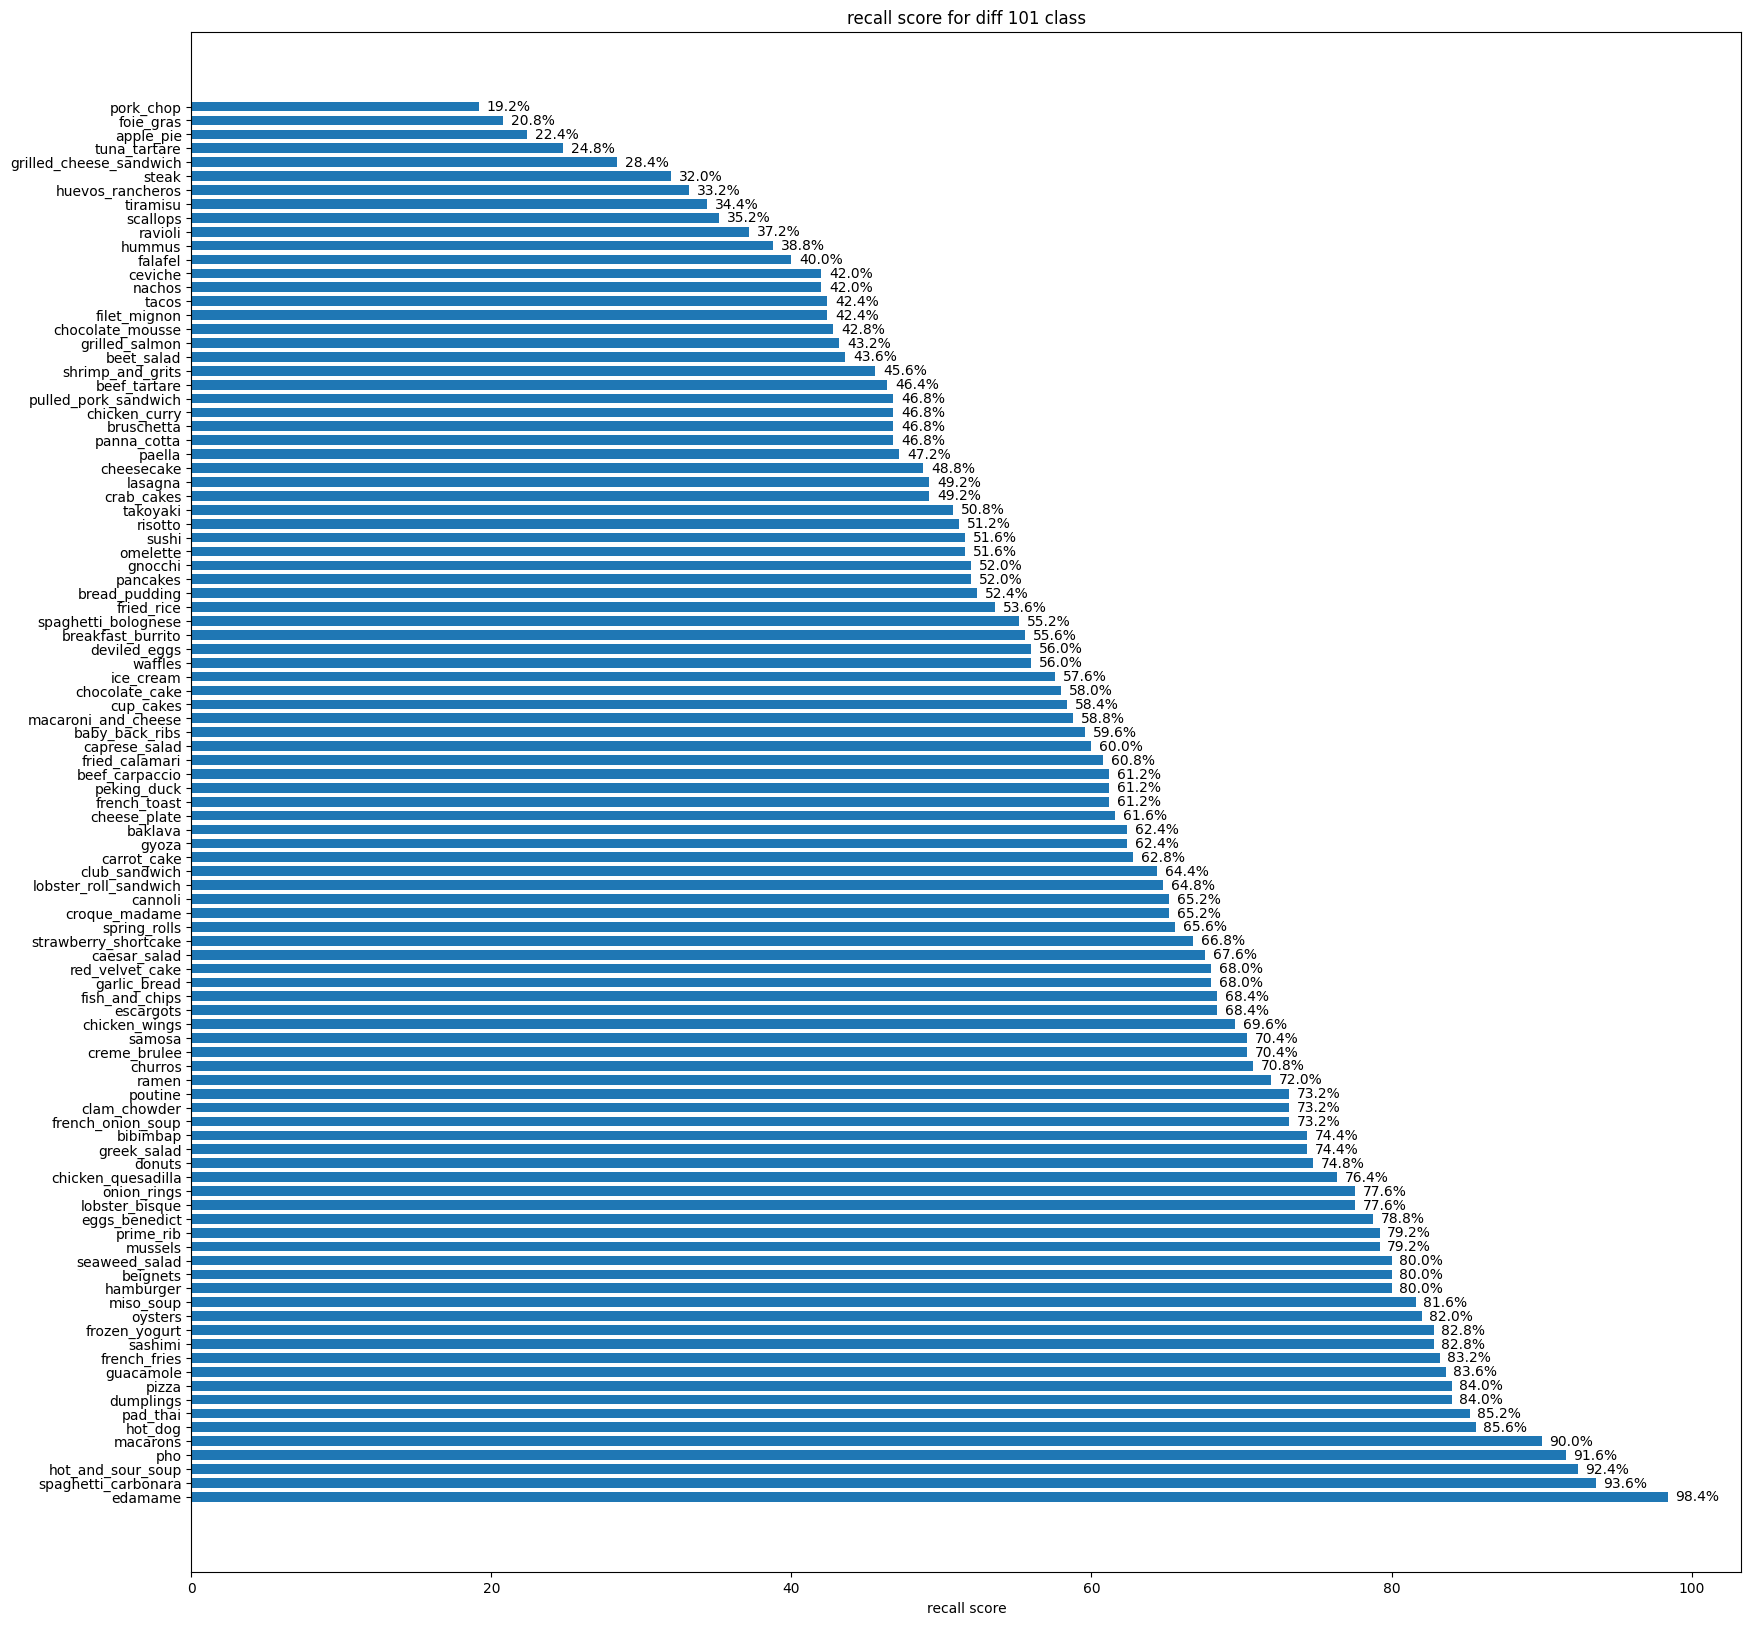

In [139]:
score_classes("recall",df_recall.class_name,df_recall.recall_score)

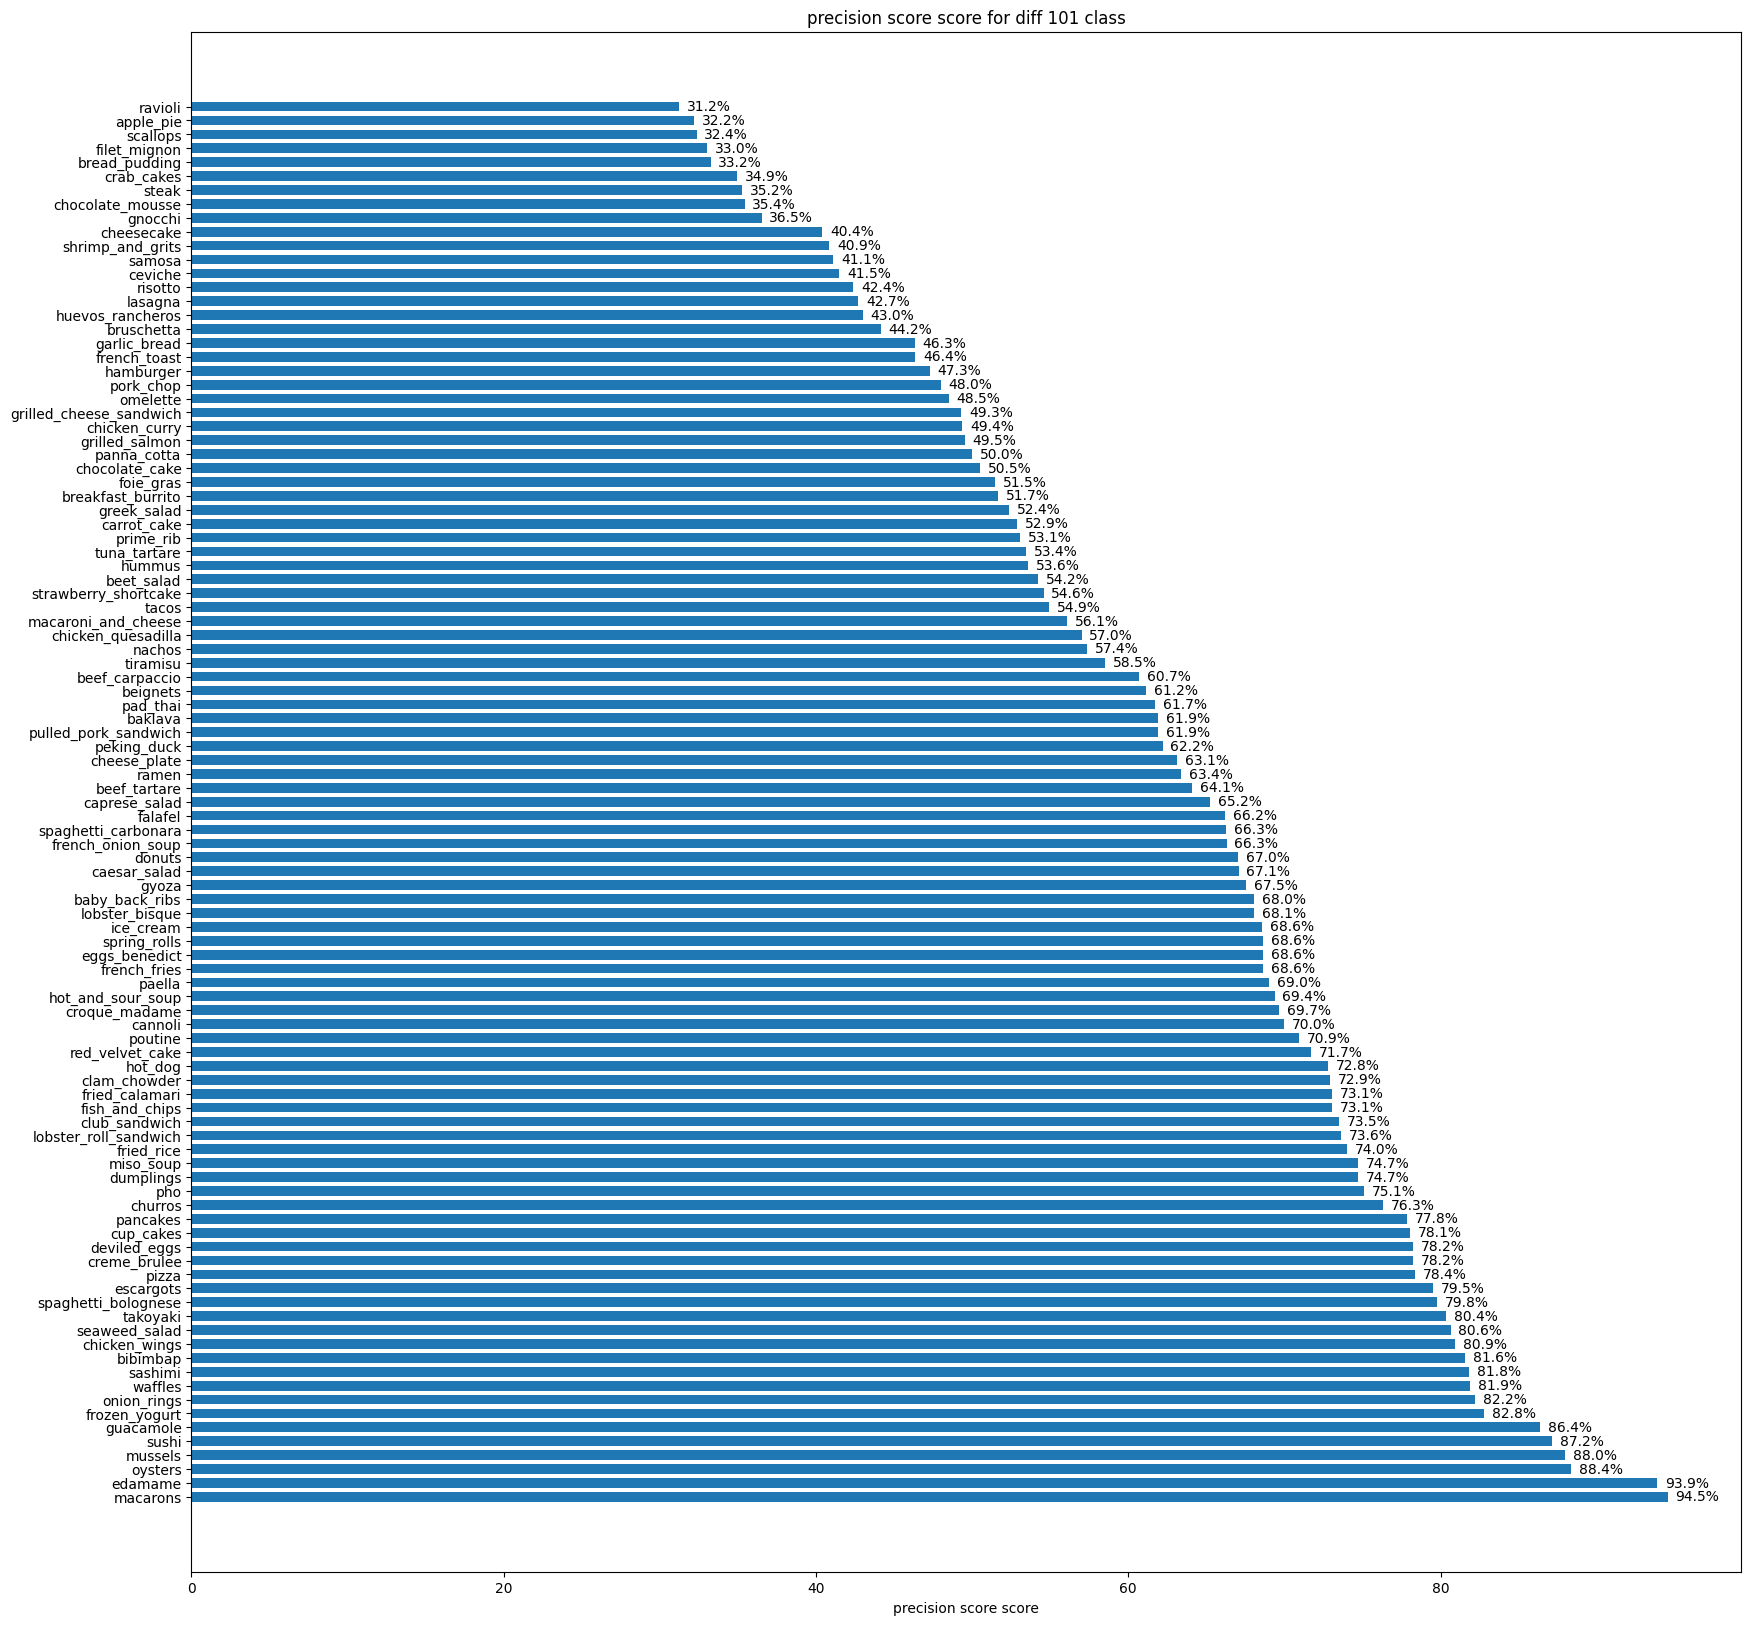

In [140]:
score_classes("precision score",df_precision.class_name,df_precision.precision_score)

## predicat on random images


In [19]:
def load_image(path:str,img_shape=(224,224),scale=True):
    image_unencoded=tf.io.read_file(path)
    image_encoded=tf.io.decode_image(image_unencoded)
    image=tf.image.resize(image_encoded,size=img_shape)
    if not scale:
        image/=225.0
    return image
    